In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
plt.style.use('fivethirtyeight')

In [2]:
df_courses=pd.read_csv('LA_nursing_course_descriptions.csv', encoding='cp1252', sep='\t', names=['course_code', 'course_name', 'course_desc'])

In [3]:
from nltk.stem import PorterStemmer

In [4]:
porter = PorterStemmer()

In [5]:
#job titles word clouds
#generating positive reviews word cloud
course_desc_words = ' '.join(porter.stem(str(cd)) for cd in df_courses['course_desc'])

In [6]:
for word in course_desc_words:
    re.sub(r'[^\w\s]','',word)

In [7]:
more_stopwords = {'course','offers','instructions','study','methods','given','students','develop','city','county',
                  'areas','basic','industry','related','placed','emphasis','skills','techniques','covers','fundamentals'
                  , 'involves', 'current', 'discussed', '101', '103'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

In [8]:
# remove URLs and words that start with @
course_desc_cleaned_tags = " ".join([word for word in course_desc_words.split()
                            ])

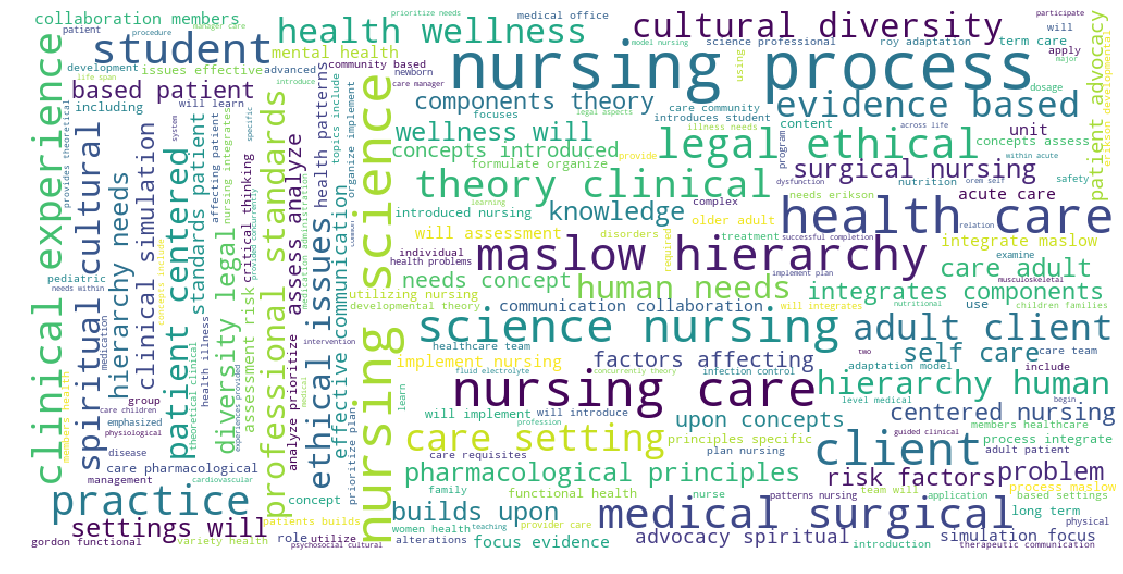

<Figure size 432x288 with 0 Axes>

In [9]:
wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(course_desc_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_job_desc.png', bbox_inches='tight')

In [10]:
import nltk
from nltk import FreqDist

In [11]:
course_desc_stopwords_cleaned = " ".join([word for word in course_desc_words.split() if word.lower() not in STOPWORDS and len(word)>3
                            ])
    
course_desc_stopwords_punc_cleaned = " ".join([re.sub(r'[^\w\s]','',word) for word in course_desc_stopwords_cleaned.split() if word not in STOPWORDS
                            ])

In [12]:
fdist2= FreqDist(nltk.ngrams(course_desc_stopwords_punc_cleaned.split(),2))

In [13]:
with open("bigrams_nursing_courses_raw_data.csv", "w") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(fdist2.most_common(300))

In [47]:
df_bigrams=pd.read_csv('bigrams_nursing_courses_cleaned_labeled_manually.csv')

In [48]:
df_hardskills = df_bigrams[df_bigrams['Label']=='Hard skill']

In [49]:
df_hardskills.reset_index(inplace=True)
df_hardskills.drop(df_hardskills.columns[0],axis=1,inplace=True)
df_hardskills.drop(df_hardskills.columns[2],axis=1,inplace=True)

C:\Users\Adrianna\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
word_dict={}
word_dict=pd.Series(df_hardskills.Frequency.values,index=df_hardskills.Bigram).to_dict()

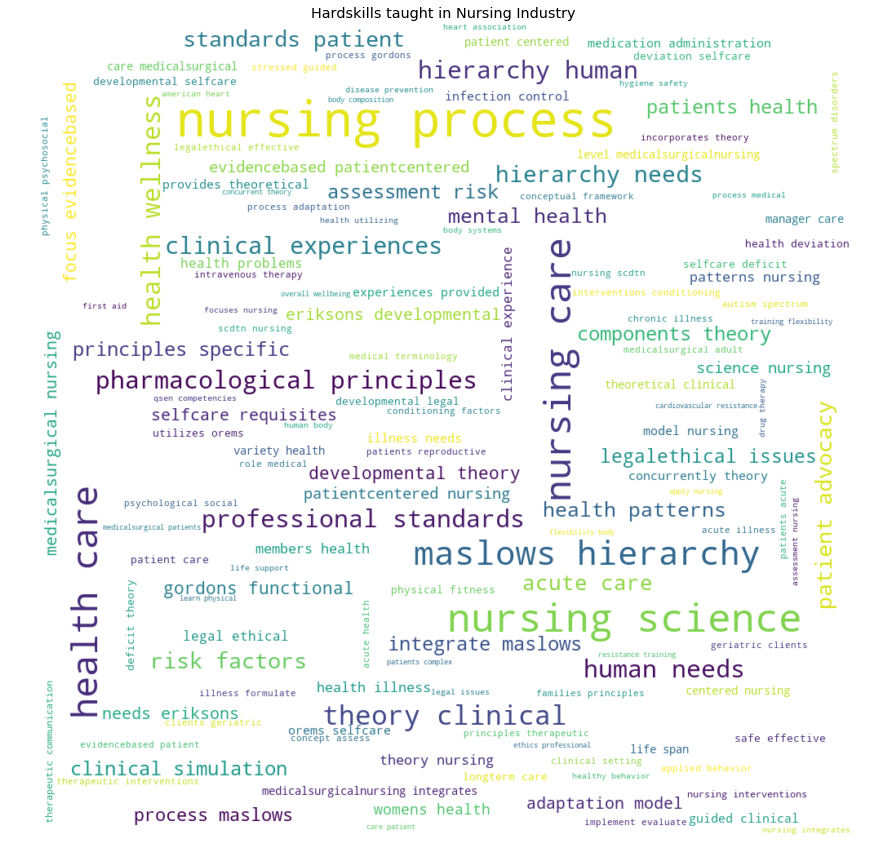

In [51]:
wordCloud = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud.generate_from_frequencies(word_dict)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Hardskills taught in Nursing Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Nursing_course_hardskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")

In [52]:
df_hardskills_50 = df_hardskills.head(50)

In [53]:
df_hardskills_25 = df_hardskills.head(25)

In [54]:
word_dict_hs_50=pd.Series(df_hardskills_50.Frequency.values,index=df_hardskills_50.Bigram).to_dict()

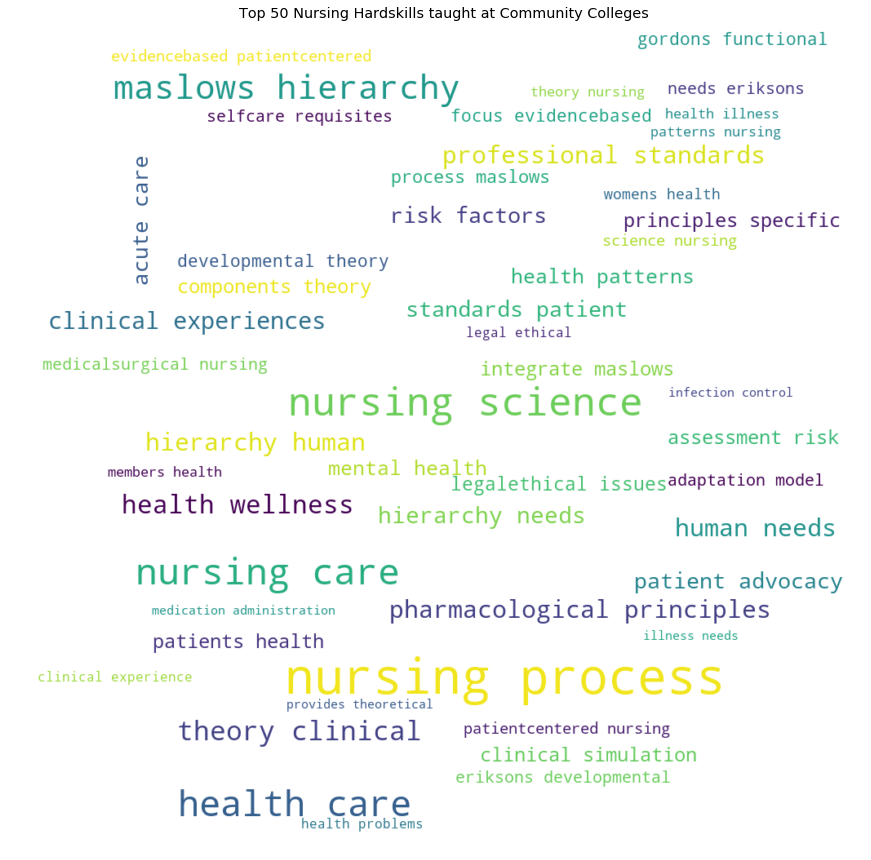

In [55]:
wordCloud_hs_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_50.generate_from_frequencies(word_dict_hs_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Nursing Hardskills taught at Community Colleges')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Nursing_Hardskills_top_50_supply_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")

In [56]:
word_dict_hs_25=pd.Series(df_hardskills_25.Frequency.values,index=df_hardskills_25.Bigram).to_dict()

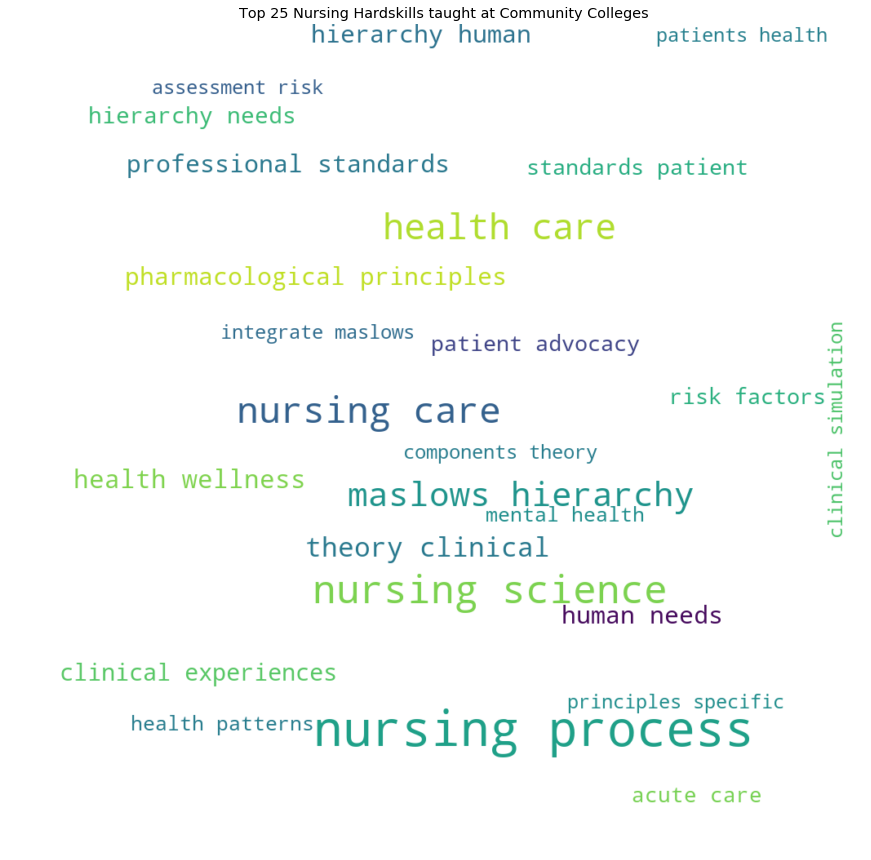

In [57]:
wordCloud_hs_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_25.generate_from_frequencies(word_dict_hs_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Nursing Hardskills taught at Community Colleges')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Nursing_hardskills_top_25_supply_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")